In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Specify the path to your Google Sheets file
file_path = '/content/drive/MyDrive/Veg_Non_veg_Dataset.xlsx'  # Change this path to your file's location

# Read the Google Sheets file into a DataFrame
df = pd.read_excel(file_path)
df= df.dropna()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Column_Name' is the column you want to modify
column_to_modify = 'Type'

# Remove newline characters from the specified column
df['Type'] = df['Type'].replace('\n', 2)
# df['Type'] = df['Type'].replace('2 ', 2)

# Print the modified DataFrame
# print(df)


In [ ]:
df.head()

,ingredients,Type
0,"romaine lettuce, black olives, grape tomatoes,...",0
1,"plain flour, ground pepper, salt, tomatoes, gr...",1
2,"eggs, pepper, salt, mayonaise, cooking oil, gr...",2
3,"water, vegetable oil, wheat, salt",0
4,"black pepper, shallots, cornflour, cayenne pep...",2


In [ ]:
import pandas as pd

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['Type'])


In [ ]:
df.head(40)

,ingredients,Type_0,Type_1,Type_2
0,"romaine lettuce, black olives, grape tomatoes,...",1,0,0
1,"plain flour, ground pepper, salt, tomatoes, gr...",0,1,0
2,"eggs, pepper, salt, mayonaise, cooking oil, gr...",0,0,1
3,"water, vegetable oil, wheat, salt",1,0,0
4,"black pepper, shallots, cornflour, cayenne pep...",0,0,1
5,"plain flour, sugar, butter, eggs, fresh ginger...",0,1,0
6,"olive oil, salt, medium shrimp, pepper, garlic...",0,0,1
7,"sugar, pistachio nuts, white almond bark, flou...",0,1,0
8,"olive oil, purple onion, fresh pineapple, pork...",0,0,1
9,"chopped tomatoes, fresh basil, garlic, extra-v...",1,0,0


In [ ]:
df["ingredients"][10]

'pimentos, sweet pepper, dried oregano, olive oil, garlic, sharp cheddar cheese, pepper, swiss cheese, provolone cheese, canola oil, mushrooms, black olives, sausages'

In [ ]:
df = df.sample(frac=1,random_state=42)
df.head()

,ingredients,Type_0,Type_1,Type_2
4117,"ALMOND MILK (WATER, ALMONDS, CUCUMBERS, RICE S...",1,0,0
7681,"GARBANZO BEANS, SESAME SEEDS, BLENDED OLIVE/CA...",1,0,0
2191,"INGREDIENTS: CHICKEN BREAST WITH RIB MEAT, WAT...",0,0,1
3357,ORGANIC TOMATO PASTE.,1,0,0
6099,"ORGANIC POTATOES, ORGANIC SAFFLOWER AND/OR SUN...",1,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df['ingredients']
y = df.drop('ingredients', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train),len(y_train),len(X_test),len(y_test)

(7968, 7968, 1992, 1992)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
max_vocab_length = 10000
max_length = 30
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer.adapt(X_train)

In [ ]:
sample_sentence = "coco pasta beef shrimp chicken masala"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[4737,  365,  134,  280,   70,  648,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
import random
random_sentence = random.choice(X_train)
random_sentence, text_vectorizer([random_sentence])

('BROWN SUGAR, CORN SYRUP, CONFECTIONERY COATING (SUGAR, PALM KERNEL OIL, NONFAT DRY MILK, MILK, SOY LECITHIN [EMULSIFIER], SALT), SUGAR, POPCORN, BUTTER (CREAM, SALT), PUMPKIN SPICE SEASONING (SPICES [INCLUDING CINNAMON], SEA SALT, LESS THAN 2%: SILICON DIOXIDE [ANTICAKING]), NATURAL FLAVORS, SALT, SOY LECITHIN, BAKING SODA.',
 <tf.Tensor: shape=(1, 30), dtype=int64, numpy=
 array([[  95,    4,    9,   23, 1086,  428,    4,   42,  167,    3,   89,
          135,   10,   10,   18,   32,  173,    2,    4,  707,   38,   45,
            2,  419,  136,  191,   60,  397,  181,   68]])>)

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab[:5], words_in_vocab[-5:],len(words_in_vocab)

(['', '[UNK]', 'salt', 'oil', 'sugar'],
 ['005', '0023101', '001', '0003', '00'],
 5262)

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)
embedding


In [ ]:
random_sentence = random.choice(X_train)
random_sentence, embedding(text_vectorizer([random_sentence]))

('hazelnuts, apple cider vinegar, cumin seed, corn tortillas, prunes, white onion, large garlic cloves, cinnamon sticks, allspice, red delicious apples, coriander seeds, anise, ancho chile pepper, clove, guajillo chiles, vegetable oil, low salt chicken broth, plantains',
 <tf.Tensor: shape=(1, 30, 128), dtype=float32, numpy=
 array([[[ 0.0081458 ,  0.04141349, -0.02816576, ..., -0.02038816,
          -0.01357982,  0.0092585 ],
         [ 0.02194783, -0.04638631, -0.02822895, ..., -0.01978996,
           0.04849062,  0.00713649],
         [ 0.02450395,  0.04708446, -0.00308438, ...,  0.04259911,
          -0.01907283, -0.00029136],
         ...,
         [-0.012401  , -0.00848991,  0.02229834, ..., -0.04725286,
          -0.04216645, -0.00562242],
         [ 0.0470129 ,  0.01401032, -0.02585485, ...,  0.00711472,
          -0.02718621, -0.03461621],
         [-0.03821906, -0.01468203, -0.04088218, ...,  0.01033336,
           0.00884318,  0.01499656]]], dtype=float32)>)

In [ ]:
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed[0][0],sample_embed.shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.0081458 ,  0.04141349, -0.02816576,  0.04238472, -0.02582388,
        -0.04776603,  0.01736149, -0.03262211, -0.01086851,  0.01971108,
         0.0371061 , -0.00114007,  0.00438082,  0.03913197, -0.03257958,
         0.04382845,  0.04867119, -0.03167506, -0.03905956,  0.00611079,
         0.03826118, -0.02282456, -0.02784931,  0.034878  ,  0.03954715,
        -0.04958617,  0.00107025,  0.02127961,  0.0122952 , -0.0306113 ,
         0.01120488, -0.03037478, -0.04123633,  0.01470304, -0.0253655 ,
         0.01392889, -0.0223619 ,  0.03318218, -0.00978709, -0.00174759,
        -0.0228273 ,  0.00260073, -0.02062547,  0.00036753, -0.03031733,
        -0.04993186,  0.0057408 ,  0.02214623,  0.04348442, -0.01226466,
         0.04509529, -0.02482156, -0.02024496, -0.03046228,  0.03461095,
         0.04300909,  0.01439932, -0.04179477, -0.00092662, -0.04719335,
         0.0303087 , -0.03630799,  0.00270764,  0.00593805, -0.01207585,
  

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
print(inputs.shape)
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x)
# x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling1D()(x)
combined_dropout = layers.Dropout(0.5)(x)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
# x = layers.BatchNormalization()(combined_dense)
final_dropout = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(final_dropout)
Model_1 = tf.keras.Model(inputs, outputs)


(None, 1)
(None, 30)
KerasTensor(type_spec=TensorSpec(shape=(None, 30, 128), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity:0', description="created by layer 'embedding'")


In [ ]:
# Replace all occurrences of a specific value in the DataFrame



In [ ]:
y_train[:3]

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
import numpy as np
Model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# train_lables = tf.reshape(train_labels, (-1, 15, 1))
history = Model_1.fit(X_train, y_train, validation_data = (X_test,y_test),epochs = 10)
# train_sentences.shape,train_labels.shape
# val_sentences.shape,val_labels.shape

Epoch 1/10
249/249 [==============================] - 6s 19ms/step - loss: 0.7540 - accuracy: 0.7067 - val_loss: 0.5969 - val_accuracy: 0.7696
Epoch 2/10
249/249 [==============================] - 8s 34ms/step - loss: 0.5292 - accuracy: 0.7968 - val_loss: 0.4834 - val_accuracy: 0.8097
Epoch 3/10
249/249 [==============================] - 7s 28ms/step - loss: 0.4344 - accuracy: 0.8337 - val_loss: 0.4225 - val_accuracy: 0.8379
Epoch 4/10
249/249 [==============================] - 4s 17ms/step - loss: 0.3710 - accuracy: 0.8613 - val_loss: 0.3876 - val_accuracy: 0.8529
Epoch 5/10
249/249 [==============================] - 5s 21ms/step - loss: 0.3287 - accuracy: 0.8813 - val_loss: 0.3651 - val_accuracy: 0.8665
Epoch 6/10
249/249 [==============================] - 5s 20ms/step - loss: 0.2975 - accuracy: 0.8968 - val_loss: 0.3510 - val_accuracy: 0.8740
Epoch 7/10
249/249 [==============================] - 4s 17ms/step - loss: 0.2712 - accuracy: 0.9060 - val_loss: 0.3439 - val_accuracy: 0.8770

In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 7s (692 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-en

In [ ]:
!pip install Pillow

In [ ]:
import pytesseract
from PIL import Image
image = Image.open('/content/Ingredients_1.jpg')  # Replace 'your_image.png' with the actual image file path

# Perform OCR on the image
text = pytesseract.image_to_string(image, lang='eng')  # 'eng' specifies the English language

# Print or process the extracted text
print(text)
preds = Model_1.predict([text])

Sparkling Low Calorie Soft Drink with Vegetane
Extracts with Sweeteners

‘ngredients: Carbonated Water, Colour (Caramel E1500,
Sweeteners (Aspartame, Acesulfame K), Natural Fvourings
‘netting Caffeine, Phosphoric Acid, Citric Acid.
Contains a Source of Phenylalanine. =

1/1 [==============================] - 0s 229ms/step


In [ ]:
preds

array([[9.9978203e-01, 7.4371776e-05, 1.4367301e-04]], dtype=float32)

In [ ]:
results = Model_1.evaluate(X_test,y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.3321 - accuracy: 0.8876


In [ ]:
Model1_preds = Model_1.predict([X_test])
Model1_preds = tf.squeeze(tf.round(Model1_preds))
Model1_preds[:10]

63/63 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)>

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calc_results(y_true,y_preds):
  model_accuracy = accuracy_score(y_true, y_preds) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [ ]:
Model_1_results = calc_results(y_true = y_test, y_preds = Model1_preds)
Model_1_results

{'accuracy': 87.95180722891565,
 'precision': 0.8916320838143001,
 'recall': 0.8795180722891566,
 'f1': 0.8836525829371644}

In [ ]:
# from sklearn.metrics import f1_score, recall_score, precision_score

# micro_recall = recall_score(y_test, Model1_preds, average='micro')
# macro_recall = recall_score(y_test, Model1_preds, average='macro')
# weighted_recall = recall_score(y_test, Model1_preds, average='weighted')

# # Calculate Precision using micro, macro, and weighted averages
# micro_precision = precision_score(y_test, Model1_preds, average='micro')
# macro_precision = precision_score(y_test, Model1_preds, average='macro')
# weighted_precision = precision_score(y_test, Model1_preds, average='weighted')

# # Calculate F1 Score using micro, macro, and weighted averages
# micro_f1 = f1_score(y_test, Model1_preds, average='micro')
# macro_f1 = f1_score(y_test, Model1_preds, average='macro')
# weighted_f1 = f1_score(y_test, Model1_preds, average='weighted')

# # print("Micro Recall:", micro_recall)
# # print("Macro Recall:", macro_recall)
# print("Weighted Recall:", weighted_recall)

# # print("Micro Precision:", micro_precision)
# # print("Macro Precision:", macro_precision)
# print("Weighted Precision:", weighted_precision)

# # print("Micro F1 Score:", micro_f1)
# # print("Macro F1 Score:", macro_f1)
# print("Weighted F1 Score:", weighted_f1)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

num_labels = y_test.shape[1]

# Initialize the confusion matrix with zeros
conf_matrix = np.zeros((num_labels, num_labels), dtype=int)

# Calculate the confusion matrix
for i in range(num_labels):
    for j in range(num_labels):
        conf_matrix[i, j] = np.sum((y_test[:, i] == 1) & (Model1_preds[:, j] == 1))

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1291   25   35]
 [  53   85    8]
 [  77    7  376]]


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def make_multilabel_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15):
    """
    Makes a confusion matrix for multilabel classification comparing predictions and ground truth labels.

    Args:
        y_true: Array of true labels (must be the same shape as y_pred).
        y_pred: Array of predicted labels (must be the same shape as y_true).
        classes: Array of class labels (e.g., string form). If None, integer labels are used.
        figsize: Size of the output figure (default=(10, 10)).
        text_size: Size of the output figure text (default=15).

    Returns:
        A labeled confusion matrix plot comparing y_true and y_pred.

    Example usage:
        make_multilabel_confusion_matrix(y_true=test_labels,  # Ground truth test labels
                                        y_pred=y_preds,  # Predicted labels
                                        classes=class_names,  # Array of class label names
                                        figsize=(15, 15),
                                        text_size=10)
    """
    n_classes = len(classes) if classes else y_true.shape[1]

    # Create the confusion matrices for each label
    confusion_matrices = []
    for i in range(n_classes):
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        confusion_matrices.append(cm)

    # Plot the figure and make it pretty
    fig, axes = plt.subplots(nrows=1, ncols=n_classes, figsize=figsize)
    fig.subplots_adjust(wspace=0.5)

    for i, ax in enumerate(axes):
        cax = ax.matshow(confusion_matrices[i], cmap=plt.cm.Blues)
        fig.colorbar(cax, ax=ax)

        ax.set(title=f"Conf.for Label {i}",
               xlabel="Predicted label",
               ylabel="True label",
               xticks=np.arange(2),  # Assuming binary classification for each label
               yticks=np.arange(2),
               xticklabels=["0", "1"],  # Replace with class labels if necessary
               yticklabels=["0", "1"])

        ax.xaxis.set_label_position("bottom")
        ax.xaxis.tick_bottom()

        threshold = (confusion_matrices[i].max() + confusion_matrices[i].min()) / 2.

        for j, k in itertools.product(range(confusion_matrices[i].shape[0]), range(confusion_matrices[i].shape[1])):
            ax.text(k, j, f"{confusion_matrices[i][j, k]}",
                    horizontalalignment="center",
                    color="white" if confusion_matrices[i][j, k] > threshold else "black",
                    size=text_size)

    plt.show()

# Example usage:
# make_multilabel_confusion_matrix(y_true, y_pred, classes=["Label A", "Label B", "Label C"])


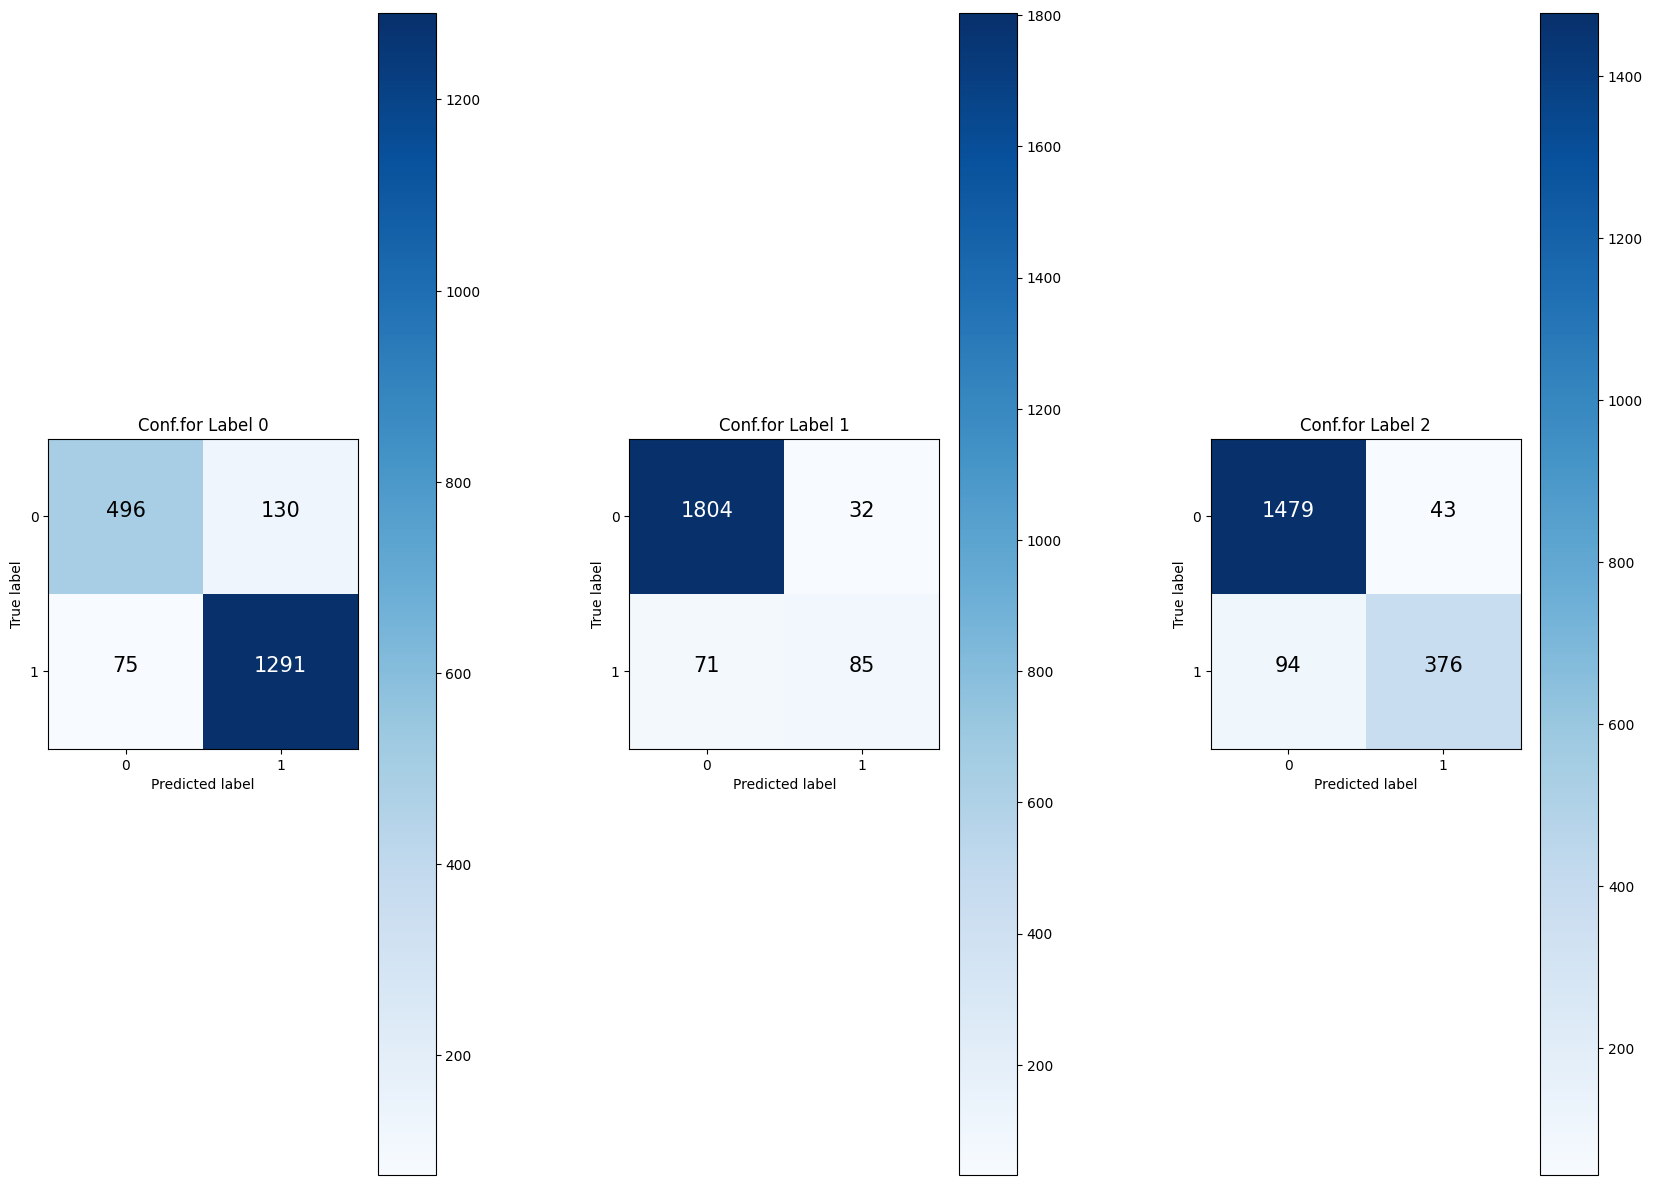

In [ ]:
make_multilabel_confusion_matrix(y_test,Model1_preds,["Veg","Egg","Non-veg"])

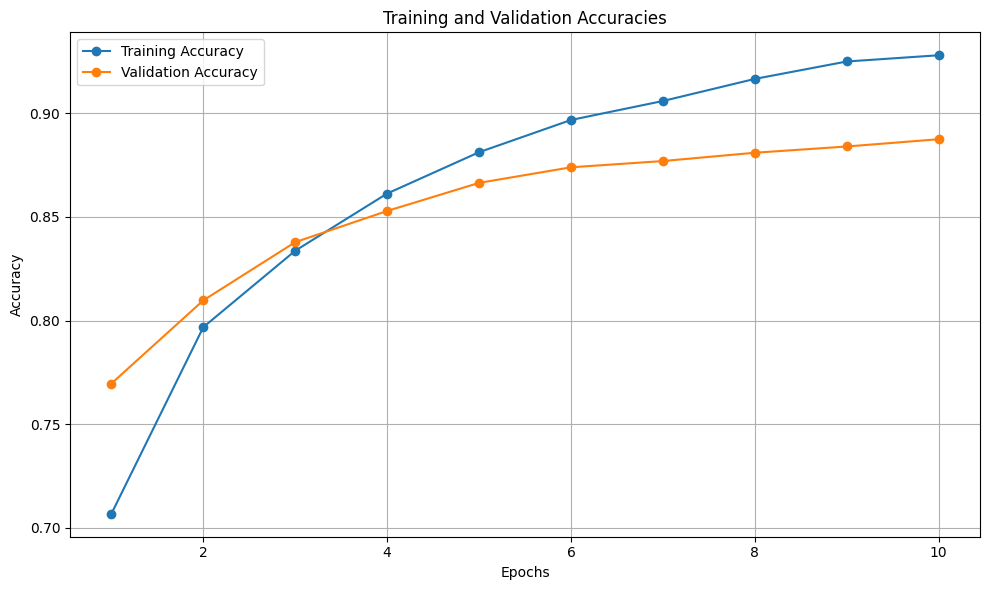

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model with the `fit` method
# history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs)

# Extract training and validation accuracies
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

# Extract the number of epochs
epochs = range(1, len(train_accuracies) + 1)

# Plot training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')

plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


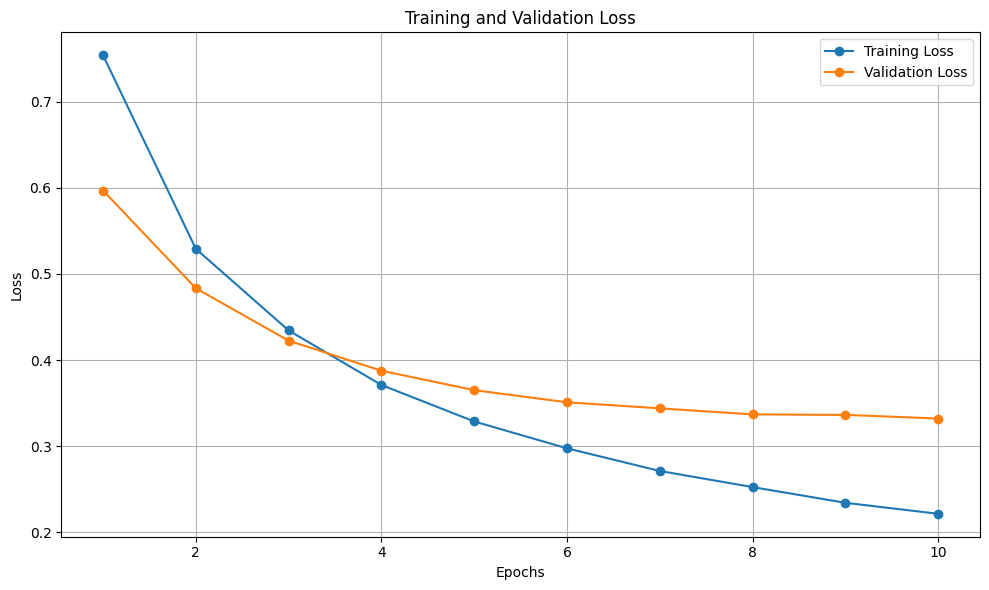

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model with the `fit` method
# history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs)

# Extract training and validation accuracies
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()